# **ИССЛЕДОВАНИЕ НАДЕЖНОСТИ ЗАЕМЩИКОВ**

## **1. Обзор данных** <a id = 'step_1'></a>

In [938]:
import pandas as pd # импорт библиотеки pandas для работы с датафреймом

#создание датафрейма, сохранение данных в переменной df
df = pd.read_csv(r'C:\Users\vizum\Desktop\yandex_practicum\project_2_credit_scoring\data.csv')

df.info() # вывод общей информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [939]:
#Определение доли пропущенных значений в столбцах days_employed и total_income
#Количество пропущенных значений сохраним в отдельную переменную, в дальнейшем пригодится
start_missed_value = df['days_employed'].isna().sum()

#Доля пропущенных значений в процентах
miss_rate = start_missed_value/df.shape[0] 

#вывод доли пропущщенных значений
f'Доля пропущенных значений в столбце days_employed и столбце total_income: {miss_rate:.1%}'

'Доля пропущенных значений в столбце days_employed и столбце total_income: 10.1%'

In [940]:
display(df.head(10)) # вывод на экран первых десяти строк датафрейма
df.tail(10) # вывод на экран последних десяти строк датафрейма

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21515,1,-467.685130,28,среднее,1,женат / замужем,0,F,сотрудник,1,109486.327999,заняться образованием
21516,0,-914.391429,42,высшее,0,женат / замужем,0,F,компаньон,0,322807.776603,покупка своего жилья
21517,0,-404.679034,42,высшее,0,гражданский брак,1,F,компаньон,0,178059.553491,на покупку своего автомобиля
21518,0,373995.710838,59,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем
21519,1,-2351.431934,37,ученая степень,4,в разводе,3,M,сотрудник,0,115949.039788,покупка коммерческой недвижимости
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля
21524,2,-1984.507589,40,среднее,1,женат / замужем,0,F,сотрудник,0,82047.418899,на покупку автомобиля


**Выводы:** <a id = 'concl_1'></a>
1. В столбце ***days_employed*** присутствуют аномальные значения:
  - отрицательные - стаж не может быть меньше 0;
  - очень большие, превышающие продолжительность жизни человека;
  
  
2. В столбце ***education*** присутствуют неявные дубликаты.


3. В столбцах ***days_emloyed*** и ***total_income*** есть пропуски, причем количество пропусков одинаково. Возможно, пропуски обусловлены одним и тем же фактором. В связи с тем, что доля пропущенных значений для каждого из указанных столбцов составляет 10.1%, исключать строки с пропусками из обработки нежелательно - это может исказить результаты. 


4. Названия столбцов корректны: отсутствуют прописные буквы, нет пробелов, выдержан стиль snake_case.

_Методиеские указания по проекту предлагает сначала заполнить пропуски в `total_income` медианными значениями, а затем выполнить проверку данных на аномальные значения. В таком случае медиана будет искажена аномальными значениями, в связи с этим выполним сначала исправление данных, а затем заполним пропуски_


## 2. Проверка данных на аномалии и исправления.

Полученная на этапе [обзора данных](#step_1) информация не дает полное представление о качестве выборки. Для получения дополнительных сведений выполним детальный анализ по каждому столбцу и при необходимости выполним корректировку данных.

### 2.1 Анализ значений столбца `children`

Проверим, есть ли аномальные значения в столбце `'children'`. Для этого определим, какие наборы количества детей в выборке присутствуют, и какое количество заемщиков соответствует каждому набору. 

In [941]:
# Воспользуемся методом value_counts()
# Отсортируем полученный Series по индексу - для облегчения визуального восприятия результатов.
df['children'].value_counts().sort_index()

-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

**Выводы:**
1. У 47-и заемщиков количество детей отрицательное, что невозможно. Вероятно, ошибка возникла при подготовке выборки. Это предположение подтверждает и наличие отрицательных значений в столбце `days_employed`. Скорее всего, минус остался от какого-либо разделителя, поэтому для дальнейшей работы его просто откинем.

2. У 76-и заемщиков 20 детей. В теории - возможно, но все же многовато. Посмотрим, что говорит статистика (и котики :)) ).


По данным сайта [RT](https://russian.rt.com/russia/article/372844-chislo-mnogodetnyh-semei-rossiya) в 2017 году количество семей с 11 и более детей составляет 929 семей. По данным [Росстата](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Frosstat.gov.ru%2Fstorage%2Fmediabank%2Fdemo11(1).xls&wdOrigin=BROWSELINK) в России в 2017 году проживало 146.8 млн человек. Предположим, что выборка репрезентативна (другой нет :) ) и соответствует моменту создания выборки (действительно, количество детей быстро не растет). Рассчитаем ожидаемое количество заемщиков в выборке с количеством детей 11 и более.

In [942]:
print(f'Ожидаемое количество заемщиков с количеством детей 11 и более: {929/(146.8*10**6)*df.shape[0]:.1}')

Ожидаемое количество заемщиков с количеством детей 11 и более: 0.1


Число заемщиков с 20-ю детьми должно быть еще меньше, однако в текущей выборке их 76 человек, что не может быть правдой. Вероятно, в данные попал лишний ноль, далее его удалим.

Исправление аномальных значений столбца `children`

In [943]:
# заменим отрицательные значения на положительные
df.loc[df['children'] < 0, 'children'] = abs(df['children'])

# уберем лишний 0 из данных
df.loc[df['children'] == 20, 'children'] = 2

Проверим результаты:

In [944]:
# Воспользуемся методом value_counts()
# Отсортируем полученный Series по индексу - для облегчения визуального восприятия результатов.
df['children'].value_counts().sort_index()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

Аномальных значений нет, столбец `children` готов к работе.

### 2.2 Анализ значений столбца `income_type`

Возможно, аномальные значения столбца `days_employed` связаны со значениями столбца `income_type`, поэтому для получения достоверных результатов анализа проверим корректность заполнения столбца `income_type`.

Так как пропуски в этом столбце [отсутствуют](#step_1), проверим строку на неявные дубликаты:

In [945]:
df['income_type'].sort_values().unique()

array(['безработный', 'в декрете', 'госслужащий', 'компаньон',
       'пенсионер', 'предприниматель', 'сотрудник', 'студент'],
      dtype=object)

Неявных дубликатов нет, пропуски отсутствуют, можно идти дальше.

### 2.3 Анализ значений столбца `days_employed`

_Для подтверждения гипотез данные этого столбца не нужны, но так как это учебный проект, почему бы не потренироваться :)_

По результатам [предыдущих этапов](#concl_1) были выявлены следующие проблемы со столбцом `days_employed`:
- в данных есть пропуски;
- присутствуют аномально большие значения;
- присутствуют отрицательные значения

Проверим следующее:
- связаны ли аномальные значения с категориями в `income_type`
- связаны ли пропуски в столбцах `days_employed` и `total_income`



**Проверка связи аномальных значений столбца `days_employed` с категориями в `income_type`**

Посчитаем количество отрицательных, нулевых и положительных значений в `days_employed`

In [946]:
print('Отрицательных значений:', df[df['days_employed'] < 0]['days_employed'].count())
print('Нулевых значений:', df[df['days_employed'] == 0]['days_employed'].count())
print('Положительных значений:', df[df['days_employed'] > 0]['days_employed'].count())

Отрицательных значений: 15906
Нулевых значений: 0
Положительных значений: 3445


Проверим, каким категориям и количеству заемщиков соответствуют отрицательные и положительные значения трудового стажа:

In [947]:
print('Распределение по отрицательным значениям')
df[df['days_employed'] < 0]['income_type'].value_counts()

Распределение по отрицательным значениям


сотрудник          10014
компаньон           4577
госслужащий         1312
предприниматель        1
в декрете              1
студент                1
Name: income_type, dtype: int64

In [948]:
print('Распределение по положительным значениям')
df[df['days_employed'] > 0]['income_type'].value_counts()

Распределение по положительным значениям


пенсионер      3443
безработный       2
Name: income_type, dtype: int64

Среди заемщиков с отрицательным стажем нет ни одного пенсионера или безработного, а среди заемщиков с положительным стажем нет ни одного работающего. Вероятно, аномально большие значения трудового стажа соответствуют безработным и пенсионерам. Найдем минимальное значение положительного трудового стажа:

In [949]:
df[df['days_employed'] > 0]['days_employed'].min()

328728.72060451825

Минимальный положительный трудовой стаж составляет чуть больше 900 лет. Действительно, гипотеза подтвердилась. В дальнейшем заменим аномально большие значения средним значением трудового стажа для пенсионеров и двух безработных, исходя из возраста начала работы и выхода на пенсию, а также пола заемщика. Отрицательные значения заменим их модулями.

**Проверка связи пропусков в столбцах `days_employed` и `total_income`**

Посчитаем количество строк, для котoрых пропуски в столбцах `days_employed` и `total_income` совпадают:

In [950]:
print('Строк с пропусками в обоих столбцах:', df.loc[(df['days_employed'].isna())&(df['total_income'].isna())]['children'].count())
print('Пропущено значений в каждом столбце:', start_missed_value)

Строк с пропусками в обоих столбцах: 2174
Пропущено значений в каждом столбце: 2174


Проверим распределение пропусков по категориям занятости: <a id = 'missing_by_tot_inc'></a>

In [951]:
df[df['total_income'].isna()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Количество строк с пропусками в обоих столбцах совпадает с общим количеством пропусков по каждому столбцу. Значит, пропуски вызваны либо одной и той же ошибкой при формировании выборки, либо информация не указана намеренно - может быть, заемщик работает неофициально. Для установления источника пропусков нужна дополнительная информация. Так как она недоступна, заменим пропуски в столбце `days_employed` медианным значением - в таком случае новые данные не будут искажены влиянием сильно отличающихся значений. 

**Исправление пропусков и аномальных значений в `days_employed`**

Заменим аномальные значения и пропуски для пенсионеров и двух безработных с аномально большим стажем на средний трудовой стаж для пенсионеров в России (будем считать, что здесь 'безработный' = 'пенсионер'). Так как возраст выхода на пенсию для мужчин и женщин различается, учтем этот фактор при корректировке данных. Однако перед началом исправления проверим, для всех ли заемщиков корректно указан пол:

In [952]:
df['gender'].value_counts() #проверка корректности указания пола в датафрейме

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

Неожиданно - количество заемщиков-женщин в два раза больше, чем мужчин! Интересный факт. 
В столбце `gender` выявлено некорректное значение 'XNA'. Посмотрим, какой категории занятости он соответствует:

In [953]:
df[df['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Заемщик со значением `df['gender'] = 'XNA'` не пенсионер и не безработный, пропуски в строке отсутствуют. Исходя из этого, пол этого заемщика не оказывает влияния на результат заполнения пропусков. Так как в дальнейшем пол заемщика не используется, оставим его без изменений.

Выполним замену аномально больших значений и **пропусков** для пенсионеров и безработных:

In [954]:
# возраст выхода на пенсию для мужчин - 65 лет, для женщин - 60 лет. Возраст начала трудовой деятельность - 18 лет.
# заполнение пропусков и исправление значений для пенсионеров
df.loc[(df['gender'] == 'M') & (df['income_type'] == 'пенсионер'), 'days_employed'] = (65-18)*365 #для мужчин
df.loc[(df['gender'] == 'F') & (df['income_type'] == 'пенсионер'), 'days_employed'] = (60-18)*365 #для женщин

# заполнение пропусков для двух безработных с аномально большими значениями стажа
df.loc[(df['gender'] == 'M') & (df['days_employed'] > 0), 'days_employed'] = (65-18)*365 #для мужчин
df.loc[(df['gender'] == 'F') & (df['days_employed'] > 0), 'days_employed'] = (60-18)*365 #для женщин

#проверка 
print('Максимальное положительное значение после исправления:', df[df['days_employed'] > 0]['days_employed'].max())
print('Пропущенный стаж для пенсионеров и безработных:', df[df['income_type'] == 'пенсионер']['days_employed'].isna().sum())

Максимальное положительное значение после исправления: 17155.0
Пропущенный стаж для пенсионеров и безработных: 0


Аномально большие значения исправлены, перейдем к отрицательным: заменим отрицательные значения на их модули и проверим результат:

In [955]:
#замена отрицательных значений модулями
df.loc[df['days_employed'] < 0, 'days_employed'] = abs(df['days_employed'])

#проверка
print('Отрицательных значений после исправления:', df[df['days_employed'] < 0]['days_employed'].count())

Отрицательных значений после исправления: 0


Проверим, для каких категорий занятости остались пропуски в трудовом стаже:

In [956]:
df[df['days_employed'].isna()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Пропуски в столбце с трудовым стажем остались только для работающих слоев населения. 

Рассчитаем медианное значение для столбца `days_income` и заполним пропуски. Для расчета медианы стаж пенсионеров и безработных учитывать не будем, т.к.:
- значения стажа для этих категорий искусственное;
- указанные категории не имеют пропусков в столбце стажа;
- возраст указанных категорий лиц не относится к трудоспособному населению (по умолчанию будем считать, что безработный = пенсионер)

In [957]:
# Расчет медианы для трудового стажа
days_employed_median = df.loc[(df['income_type'] != 'пенсионер') & (df['income_type'] != 'безработный')]['days_employed'].median()

# Заполнение пропусков медианой
df['days_employed'] = df['days_employed'].fillna(days_employed_median)

# Проверка
print('Медиана трудового стажа для трудоспособного населения:', round(days_employed_median), 'дней.')
print('Количество пропусков в столбце со стажем после исправления:', df['days_employed'].isna().sum(), 'дней.')

Медиана трудового стажа для трудоспособного населения: 1630 дней.
Количество пропусков в столбце со стажем после исправления: 0 дней.


### 2.4 Анализ значений столбца `dob_years`

Проверим, корректно ли указан возраст заемщиков и исправим в случае необходимости.

In [958]:
# Выведем уникальные возраста заемщиков
df['dob_years'].sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

Возраст заемщика не может быть равным 0. Возможно, таким образом заменили пропуск значения. Остальные значения больше 18 (будем считать, что выборка приведена для заемщика из РФ :) ), что соответствует действительности.

In [959]:
# Посчитаем, для скольких заемщиков указан возраст 0.
age_zero = df[df['dob_years'] == 0]['dob_years'].count()

# Процент заемщиков с некорректным возрастом
age_zero_rate = age_zero/df.shape[0]

# Вывод результата
print(f'Количество заемщиков с некорректно указанным возрастом: {age_zero}\nПроцент от общего числа заемщиков {age_zero_rate:.1%}')

Количество заемщиков с некорректно указанным возрастом: 101
Процент от общего числа заемщиков 0.5%


Процент заемщиков с некорректным возрастом составляет 0.5% от общей выборки. Для этих заемщиков можно указать медианный возраст.

In [960]:
# Расчет медианы возрастов заемщиков
dob_year_median = df[df['dob_years'] != 0]['dob_years'].median()

# Замена нулевых значений медианным
df.loc[df['dob_years'] == 0, 'dob_years'] = dob_year_median

# Проверка
df['dob_years'].sort_values().unique()

array([19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
       45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
       58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69., 70.,
       71., 72., 73., 74., 75.])

Нулевых значений нет, замена выполнена правильно.

### 2.5 Анализ значений столбца `total_income`

Полученная на этапе [обзора данных](#step_1) информация показала, что в столбце `total_income` присутствуют пропуски.

Проверим данные столбца на аномальные значения и исправим их, проверим уровень дохода для каждой категории заемщиков и заполним пропуски.

In [961]:
# отсортируем значения дохода по возрастанию и посмотрим первые пять строк
round(df['total_income'].sort_values().head())

14585    20667.0
13006    21205.0
16174    21368.0
1598     21695.0
14276    21896.0
Name: total_income, dtype: float64

In [962]:
# отсортируем значения дохода по убыванию и посмотрим первые пять строк
round(df['total_income'].sort_values(ascending = False).head())

12412    2265604.0
19606    2200852.0
9169     1726276.0
20809    1715018.0
17178    1711309.0
Name: total_income, dtype: float64

Значения доходов вполне реальны - от 20 тысяч до 2 миллионов, все как в жизни)) Отрицательных значений нет, нулевые отсутствуют.

Проверим распределение доходов по категориям заемщиков

In [963]:
df.groupby('income_type')['total_income'].median().sort_values()

income_type
в декрете           53829.130729
студент             98201.625314
пенсионер          118514.486412
безработный        131339.751676
сотрудник          142594.396847
госслужащий        150447.935283
компаньон          172357.950966
предприниматель    499163.144947
Name: total_income, dtype: float64

Среди заемщиков с пропуущенными значениями ежемесячного дохода [встречаются](#missing_by_tot_inc) сотрудники, компаньоны, госслужащие, пенсионеры и предприниматель. Медианный доход предпринимателей превышает медианный доход пенсионеров почти в 4 раза, при этом доход предпринимателя и пенсионеров отличается от доходов сотрудников, госслужащих и компаньонов. Исходя из этого, пропущенные значения дохода целесообразнее заполнять медианным значением дохода для каждой категории, а не общей по выборке.

Создадим словарь, в котором в качестве ключа будет категория заемщика, а в качестве значения - медианное значение дохода для текущей категории лиц:

In [964]:
total_income_dict = df.groupby('income_type')['total_income'].median().sort_values().to_dict()
total_income_dict

{'в декрете': 53829.13072905995,
 'студент': 98201.62531401133,
 'пенсионер': 118514.48641164352,
 'безработный': 131339.7516762103,
 'сотрудник': 142594.39684740017,
 'госслужащий': 150447.9352830068,
 'компаньон': 172357.95096577113,
 'предприниматель': 499163.1449470857}

Заменим пропуски на соответствующие значения:

In [965]:
# Все мои варианты вытащить из df значение income_type и использовать их как ключ в словаре total_income_dict
# заканчивались ошибкой "TypeError: 'Series' objects are mutable, thus they cannot be hashed", поэтому пришлось искать что-то похожее
# в Интернете и переделывать под себя :(

# Функция, которая по ключу определяет значение словаря. 
def chose_from_dict(x):
    if x in total_income_dict:
        return total_income_dict[x]

# Протестируем найденное решение. Создадим новый столбец и заполним его любым значением, пусть будет 'test'
df['test'] = 'test'

# Выберем из столбца 'total_income' значения с NaN и определяем для них значения из словаря, результат запишем в df['test']
df.loc[df['total_income'].isna(), 'test'] = df.loc[df['total_income'].isna()].apply(lambda row: chose_from_dict(row['income_type']), axis = 1)

# Посчитаем количество выполненных замен
print('Выполнено замен:',df[df['test'] != 'test']['test'].count())

# Проверим, совпадают ли строки, в которых выполнены замены, со строками, в которых есть пропуски для значений total_income
if df.loc[(df['total_income'].isna()) & (df['test'] != 'test'), 'children'].count() == start_missed_value:
    print('Отлично, все заменено там, где нужно!')
else:
    print('Необходимо проверить код!')

Выполнено замен: 2174
Отлично, все заменено там, где нужно!


Первичная проверка работоспособности кода прошла успешно. Выполним код для столбца `total_income`:

In [966]:
#Выбираем из столбца 'total_income' значения с NaN и определяем для них значения из словаря
df.loc[df['total_income'].isna(), 'total_income'] = df.loc[df['total_income'].isna()].apply(lambda row: chose_from_dict(row['income_type']), axis = 1)

Выполним проверку:

Проверим количество пропусков:

In [967]:
print('Пропусков после исправления:', df['total_income'].isna().sum())

Пропусков после исправления: 0


Заново рассчитаем медианные значения ежемесячного дохода для каждой категории занятости:

In [968]:
df.groupby('income_type')['total_income'].median().sort_values()

income_type
в декрете           53829.130729
студент             98201.625314
пенсионер          118514.486412
безработный        131339.751676
сотрудник          142594.396847
госслужащий        150447.935283
компаньон          172357.950966
предприниматель    499163.144947
Name: total_income, dtype: float64

Медианные значения для каждой категории не изменились, значит, ключи и значения при заполнении пропусков были определены верно.


Так как пропусков нет, замены выполнены в нужных строках, а медианные значения не изменились - значит, исправление выполнено верно, можно переходить к следующему этапу.

P.S. Столбец `df['test']` удалим, он больше не нужен:

In [969]:
#удаление вспомогательного столбца
df.pop('test')

#проверка названий столбцов датафрейма после удаления вспомогательного столбца
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

В списке названи столбцов удаленный столбец отсутствует, удалено успешно.

## 3. Изменение типов данных

Согласно заданию, заменим вещественный тип данных в столбце `total_income` на целочисленный Также выполним изменение типа для столбцаов `days_employed`, `dob_years`.

In [970]:
#список с именами столбцов, для которых нужно выполнить замену типа данных
list_to_replace = ['total_income', 'days_employed', 'dob_years']

#цикл для замены типов данных для с названиями из списка
for name in list_to_replace:
    df[name] = df[name].astype('int')

# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int32 
 2   dob_years         21525 non-null  int32 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int32 
 11  purpose           21525 non-null  object
dtypes: int32(3), int64(4), object(5)
memory usage: 1.7+ MB


Нужные столбцы стали целочисленными.

## 4. Удаление дубликатов

### 4.1 Неявные дубликаты

Сначала удалим неявные дубликаты, поскольку за ними могут скрываться полные дубликаты.

Неявные дубликаты могут скрываться в столбцах со строковыми значениями: `education`, `family_status`, `income_type`, `purpose`. Выполним проверку:

In [971]:
#Сформируем список с названиями столбцов, для которых будем выполнять проверку на неявные дубликаты
list_for_checking = ['education', 'family_status', 'income_type', 'purpose']

#С помощью цикла выполним проверку каждого столбца из списка на неявные дубликаты 
for name in list_for_checking:
    print('Уникальных значений в столбце', name, ':\n') # Вывод заголовка для анализируемого столбца
    print(df[name].sort_values().unique(), '\n\n') # Вывод уникальных значений анализируемого столбца

Уникальных значений в столбце education :

['ВЫСШЕЕ' 'Высшее' 'НАЧАЛЬНОЕ' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Начальное'
 'Неоконченное высшее' 'СРЕДНЕЕ' 'Среднее' 'УЧЕНАЯ СТЕПЕНЬ'
 'Ученая степень' 'высшее' 'начальное' 'неоконченное высшее' 'среднее'
 'ученая степень'] 


Уникальных значений в столбце family_status :

['Не женат / не замужем' 'в разводе' 'вдовец / вдова' 'гражданский брак'
 'женат / замужем'] 


Уникальных значений в столбце income_type :

['безработный' 'в декрете' 'госслужащий' 'компаньон' 'пенсионер'
 'предприниматель' 'сотрудник' 'студент'] 


Уникальных значений в столбце purpose :

['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции с недвижимостью'
 'операции со своей нед

- в столбце `education` есть неявные дубликаты, возникшие из-за разного регистра в записи (вероятно, вызвано свободной формой заполнения). После приведения значений к нижнему регистру неявные дубликаты будут отсутствовать;


- в столбце `family_status` неявных дубликатов нет, есть только прописные символы в значении категории "Не женат/не замужем", но это ни на что не влияет;


- в столбце `income_type` неявных дубликатов нет;


- в столбце `purpose` много неявных дубликатов, вероятно, вызванных свободной формой заполнения соответствующего поля.


Выполним удаление неявных дубликатов для столбца `education`.

In [972]:
#удаление дубликатов в education путем приведения к нижнему регистру
df['education'] = df['education'].str.lower()

#проверка удаления неявных дубликатов в education
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Неявные дубликаты в столбце `education` отсутствуют. Выбор метода устранения неявных дубликатов  `education` обусловлен тем, что род, число и падеж неявных дубликатов не меняются, и в связи с этим, приведение к нижнему регистру будет эффективнее, чем метод replace().


Выполнять удаление неявных дубликатов для столбца `purpose` не будем по следующим причинам:
- данные по этому столбцу в дальнейшем будут категоризированы;
- унификация данных в столбце с целью займа может привести к искусственному созданию полных дубликатов, и при удалении полных дубликатов будут потеряны данные

### 4.2 Удаление явных дубликатов

In [973]:
# Посчитаем количество полных дубликатов
print('Полных дубликатов:', df.duplicated().sum())

Полных дубликатов: 71


In [974]:
# Удалим полные дубликаты
df = df.drop_duplicates().reset_index(drop = True)

In [975]:
# Проверим количество полных дубликатов после удаления
print('Полных дубликатов после очистки:', df.duplicated().sum())

Полных дубликатов после очистки: 0


Явные дубликаты удалены.

# 5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Cоздаем новый датафрейм, в котором каждому уникальному значению из `education` соответствует уникальное значение `education_id`

In [976]:
#создаем новый датафрейм со столбцами education и education_id
education_category = df[['education','education_id']]

#удаляем дубликаты в новом датафрейме, чтобы остались только уникальные значения
education_category = education_category.drop_duplicates().reset_index(drop = True).sort_values(by = 'education_id')

#вывод датафррейма-словаря для education
education_category

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Cоздаем новый датафрейм, в котором каждому уникальному значению из `family_status` соответствует уникальное значение `family_status_id`

In [977]:
#создаем новый датафрейм со столбцами family_status и family_status_id
family_category = df[['family_status','family_status_id']]

#удаляем дубликаты в новом датафрейме, чтобы остались только уникальные значения
family = family_category.drop_duplicates().reset_index(drop = True).sort_values(by = 'family_status_id')

#вывод датафррейма-словаря для семейного положения
family

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Согласно заданию, удалим из датафрейма столбцы `education` и `family_status_id`

In [978]:
df.pop('education') #удаление столбца 'education'
df.pop('family_status') #удаление столбца 'family_status'
df.columns #вывод названий столбцов после удаления столбцов education и family_status

Index(['children', 'days_employed', 'dob_years', 'education_id',
       'family_status_id', 'gender', 'income_type', 'debt', 'total_income',
       'purpose'],
      dtype='object')

Дополнительные датафреймы созданы, необходимые столбцы удалены.

# 6. Категоризация дохода

Напишем функцию `total_income_category`, присваивающую замщику категорию, соответствующую его доходу

In [979]:
def total_income_category(total_income):
    if total_income < 0:
        return 'Проверьте значение дохода!' # Индикатор ошибочного значения
    elif total_income < 30001:
        return 'E'
    elif total_income < 50001:
        return 'D'
    elif total_income < 200001:
        return 'C'
    elif total_income < 1000001:
        return 'B'
    return 'A'

Проверим работу функции:

In [980]:
print(total_income_category(-10))
print(total_income_category(200))
print(total_income_category(30001))
print(total_income_category(150000))
print(total_income_category(200500))
print(total_income_category(22000000))

Проверьте значение дохода!
E
D
C
B
A


Функция работает, выполним категоризацию заемщиков по доходу. Названия категорий сохраним в столбец `df['total_income_category']`

In [981]:
#запустим функцию категоризации по доходу
df['total_income_category'] = df['total_income'].apply(total_income_category)

#отобразим результат
display(df)

#Проверим, все ли строки заполнены:
if df['total_income_category'].isna().sum() == 0:
    print('Все заполнено, идем дальше!')
else:
    print('Нужно проверить работу функции!')

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,15330,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C
...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B
21450,0,15330,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C
21451,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C
21452,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B


Все заполнено, идем дальше!


# 7. Категоризация целей кредита

Напишем функцию, которая выполняет категоризацию целей кредита. Для дальнейшего удобства отображения на диаграммах переименуем предлагаемые Яндекс.Практикумом названия категорий следующим образом:
- "операции с недвижимостью" - "H" *(house)*
- "операции с автомобилем" - "C" *(car)*
- "получение образования" - "L" *(learning)*
- "проведение свадьбы" - "W" *(wedding)*

Целям, которые не подходят под указанные категории, присвоим категорию "AN" *(another)

In [982]:
#функция, выполняющая категоризацию заемщиков по цели кредита
def purpose_category(purpose):
    if ('авто' in purpose) or ('машин' in purpose):
        return 'C' 
    elif 'свад' in purpose:
        return 'W'
    elif 'образ' in purpose:
        return 'L'
    elif ('жил' in purpose) or ('недвиж' in purpose):
        return 'H'
    return 'AN'

Проверим корректность работы функции на тестовых данных

In [983]:
# тестовый лист с целями
test_list = ['покупка недвижимости', 'приобретение жилья', 'сыграть свадьбу', 'получить образование', 'купить автомобиль', 'купить машину']

# вывод тестового листа с целями
print(test_list)

# определение категории для каждой цели в тестовом листе
for name in test_list:
    # печать категории для каждой цели в тестовом листе
    print(purpose_category(name)) 

['покупка недвижимости', 'приобретение жилья', 'сыграть свадьбу', 'получить образование', 'купить автомобиль', 'купить машину']
H
H
W
L
C
C


Определим категорию целей для каждого заемщика в датасете. Результат сохраним в столбце `df['purpose_category']`

In [984]:
#выполнение категоризации заемщиков по цели кредита
df['purpose_category'] = df['purpose'].apply(purpose_category)

#вывод результата категоризации на экран
display(df)

#проверка, все ли категории определены:
if df[df['purpose_category'] == 'AN']['purpose'].count() == 0:
    print('Все категории определены.')
else:
    print('Нужно проверить работу функции!')

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,0,0,F,сотрудник,0,253875,покупка жилья,B,H
1,1,4024,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,C
2,0,5623,33,1,0,M,сотрудник,0,145885,покупка жилья,C,H
3,3,4124,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,L
4,0,15330,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,W
...,...,...,...,...,...,...,...,...,...,...,...,...
21449,1,4529,43,1,1,F,компаньон,0,224791,операции с жильем,B,H
21450,0,15330,67,1,0,F,пенсионер,0,155999,сделка с автомобилем,C,C
21451,1,2113,38,1,1,M,сотрудник,1,89672,недвижимость,C,H
21452,3,3112,38,1,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,C


Все категории определены.


# 8. Ответы на вопросы

Согласно заданию, необходимо привести ответы на следующие вопросы:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Для ответа на эти вопросы создадим сводные таблицы, в которых для каждого исследуемого значения параметра рассчитано среднее значение показателя `'debt'`. Так как в исходном датасете случаям невозврата кредита вовремя соответствует 1, случаям возврата кредита вовремя 0, то чем выше среднее значение показателя `'debt'` в сводной таблице, тем выше вероятность **невозврата** кредита вовремя.

Далее по сводным таблицам построим диаграммы и выполним их анализ.

## 8.1 Создание сводных таблиц

In [985]:
# Так как нам нужно создать четыре сводных таблицы, для каждой из которых необходимо рассчитать не только вероятность невозврата
# кредита, но и частоту встречаемости каждого из вариантов анализируемых параметров, для уменьшения кода создадим функцию,
# выполняющую создание сводной таблицы по указанному параметру

def my_pivot_table(df, name): #df - датасет для создания сводной таблицы, name - параметр группировки (исследуемый)
    
    #1. Cоздадим сводную таблицу для оценки влияния параметра на возврат кредита в срок
    #На данном этапе в сводной таблице для параметра группировки приведена только вероятность невозврата кредита
    pivot_data = df.pivot_table(index = name, values = 'debt', aggfunc = 'mean').reset_index()
    
    #2. Cоздадим вспомогательную таблицу, в которой посчитана встречаемость каждого варианта исследуемого параметра
    #2.1 Создадим вспомогательную таблицу, в которой посчитано количество каждого варианта исследуемого параметра
    data_by_name_count = df.groupby(name)['purpose'].count().reset_index()  
    #2.2 Переименуем столбец 'purpose' в 'occurence'
    data_by_name_count = data_by_name_count.rename(columns = {'purpose':'occurence'})
    #2.3 Рассчитаем встречаемость в процентах во столбце 'occurence' вспомогательной таблицы
    data_by_name_count['occurence'] = round(data_by_name_count['occurence']/df.shape[0]*100, 2)
    
    #3. Добавим в сводную таблицу данные о встречаемости
    pivot_data = pivot_data.merge(data_by_name_count, on = name)

    return pivot_data

#создание сводной таблицы для оценки влияния количества детей на возврат кредита в срок
children_and_debt = my_pivot_table(df, 'children')

#выведем результат
children_and_debt

,children,debt,occurence
0,0,0.075438,65.68
1,1,0.091658,22.63
2,2,0.094925,9.92
3,3,0.081818,1.54
4,4,0.097561,0.19
5,5,0.000000,0.04


In [986]:
#создание сводной таблицы для оценки влияния семейного положения на возврат кредита в срок
family_and_debt = my_pivot_table(df, 'family_status_id')

#выведем результат
family_and_debt

,family_status_id,debt,occurence
0,0,0.075452,57.51
1,1,0.093471,19.35
2,2,0.065693,4.47
3,3,0.071130,5.57
4,4,0.097509,13.10


In [987]:
# Создадим сводную таблицу для оценки влияния дохода на возврат кредита в срок
income_and_debt = my_pivot_table(df, 'total_income_category')

#выведем результат
income_and_debt

,total_income_category,debt,occurence
0,A,0.080000,0.12
1,B,0.070607,23.50
2,C,0.084920,74.65
3,D,0.060000,1.63
4,E,0.090909,0.10


In [988]:
#Создадим сводную таблицу для оценки влияния цели кредита на возврат кредита в срок
purpose_and_debt = my_pivot_table(df, 'purpose_category')

#выведем результат
purpose_and_debt

,purpose_category,debt,occurence
0,C,0.093590,20.07
1,H,0.072334,50.39
2,L,0.092200,18.71
3,W,0.080034,10.83


## 8.2 Построение диаграмм вероятности невозврата кредита

### 8.2.1 Диаграммы вероятности невозврата кредита в зависимости от количества детей
Построим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от **количества детей**. <a id = 'child_and_debt'></a>
В качестве исходных данных используем сводную таблицу children_and_debt.
Дополнительно построим диаграмму встречаемости каждой категории.

<AxesSubplot:xlabel='children', ylabel='debt'>

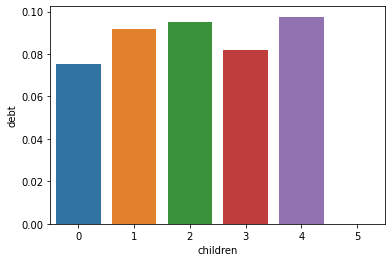

In [989]:
#импортируем библиотеку seaborn и сохраняем ее в переменной sns
import seaborn as sns 

#строим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от количества детей
sns.barplot(x = children_and_debt['children'], y = children_and_debt['debt'])

<AxesSubplot:xlabel='children', ylabel='occurence'>

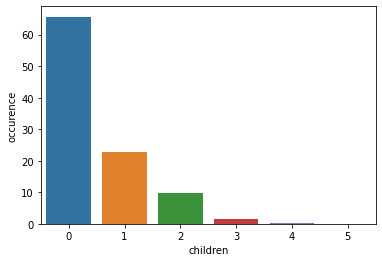

In [990]:
#строим диаграмму встречаемости (в процентах) каждой категории заемщиков по наличию дтей
sns.barplot(x = children_and_debt['children'], y = children_and_debt['occurence'])

### 8.2.2 Диаграммы вероятности невозврата кредита в зависимости от семейного положения
Построим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от **семейного положения**. <a id = 'fam_and_debt'></a>
В качестве исходных данных используем сводную таблицу family_status_and_debt. Дополнительно построим диаграмму встречаемости каждой категории.

<AxesSubplot:xlabel='family_status_id', ylabel='debt'>

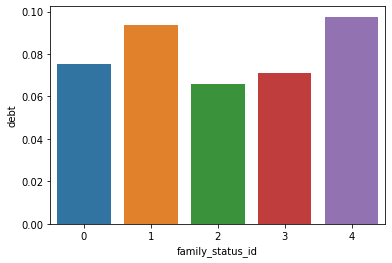

In [991]:
#строим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от семейного положения
sns.barplot(x = family_status_and_debt['family_status_id'], y = family_status_and_debt['debt'])

<AxesSubplot:xlabel='family_status_id', ylabel='occurence'>

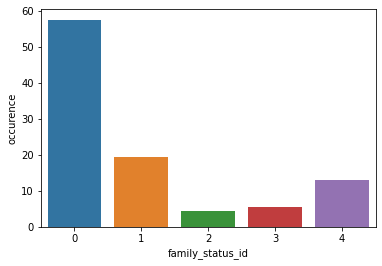

In [992]:
#строим диаграмму встречаемости (в процентах) каждой категории заемщиков по семейному положению
sns.barplot(x = family_status_and_debt['family_status_id'], y = family_status_and_debt['occurence'])

### 8.2.3 Диаграммы вероятности невозврата кредита в зависимости от уровня ежемесячного дохода
Построим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от **уровня ежемесячного дохода**. <a id = 'income_and_debt'></a>
В качестве исходных данных используем сводную таблицу income_and_debt.  Дополнительно построим диаграмму встречаемости каждой категории.

<AxesSubplot:xlabel='total_income_category', ylabel='debt'>

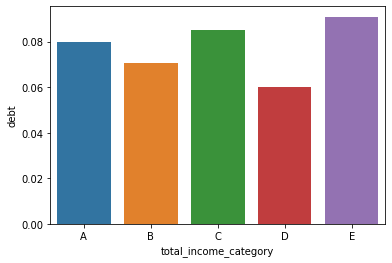

In [993]:
#строим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от уровня дохода
sns.barplot(x = income_and_debt['total_income_category'], y = income_and_debt['debt'])

<AxesSubplot:xlabel='total_income_category', ylabel='occurence'>

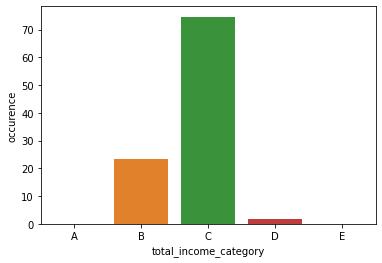

In [994]:
#строим диаграмму встречаемости (в процентах) каждой категории заемщиков по семейному положению
sns.barplot(x = income_and_debt['total_income_category'], y = income_and_debt['occurence'])

### 8.2.4 Диаграммы вероятности невозврата кредита в зависимости от целей кредита
Построим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от **цели кредита**. <a id = 'purpose_and_debt'></a>
В качестве исходных данных используем сводную таблицу purpose_and_debt.  Дополнительно построим диаграмму встречаемости каждой категории.

<AxesSubplot:xlabel='purpose_category', ylabel='debt'>

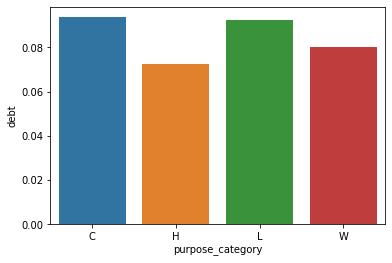

In [995]:
#строим диаграмму вероятности (в долях единицы) невозврата кредита в срок, в зависимости от цели кредита
sns.barplot(x = purpose_and_debt['purpose_category'], y = purpose_and_debt['debt'])

<AxesSubplot:xlabel='purpose_category', ylabel='occurence'>

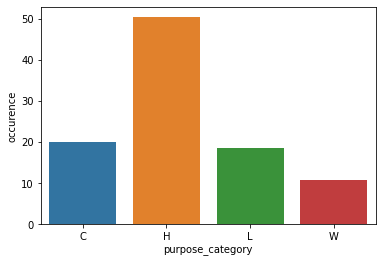

In [996]:
#строим диаграмму встречаемости (в процентах) каждой категории заемщиков по цели кредита
sns.barplot(x = purpose_and_debt['purpose_category'], y = purpose_and_debt['occurence'])

## 8.3 Ответы на поставленные вопросы

**Вопрос №1:** есть ли зависимость между количеством детей и возвратом кредита в срок?

**Ответ:** анализируя [диаграмму](#child_and_debt) вероятности невозврата кредита в срок в зависимости от количества детей, можно сказать,что при рассмотрении заемщиков с 0, 1, 2, 4 детьми прослеживается прямая зависимость: при увеличении количества детей вероятность просрочки возрастает. Так, вероятность невозврата кредита бездетными составляет ≈7%, при наличии одного ребенка ≈9.2% при наличии 4-х детей - ≈10%. Наличие детей увеличивает вероятность невозврата кредита вовремя относительно бездетных заемщиков на 1.5-2%. Однако из общего графика выбивается значения для заемщиков с 3-мя и 5-ю детьми. Причем все заемщики с 5-ю детьми вернули кредит в срок. Вероятно, здесь присутствует влияние других факторов. 
Следует отметить также, что заемщиков с количеством детей 3 и более - менее двух процентов от всей выборки, что также может сказываться на полученных результатах. Однако такой объем заемщиков с количеством детей 3 и более относительно всей выборки может соответствовать реальным данным, так как многодетных семей меньше, чем бездетных или с 1-2 детьми.


**Вопрос №2:** есть ли зависимость между семейным положением и возвратом кредита в срок?

**Ответ:** анализируя [диаграмму](#fam_and_debt) вероятности невозврата кредита в срок в зависимости от семейного положения, можно сделать следующие выводы:

- из пяти категорий семейного положения, для заемщиков, состоящих в зарегистрированном браке, наблюдается медианная вероятность невозврата кредита вовремя (7.5%);
- наиболее ответственные заемщики - заемщики, ранее состоявшие в браке. Наименьшая вероятность невозврата кредита наблюдается у вдов/вдовцов (6.6%), затем идут разведенные (7.1%). Может быть, такой результат связан с психологическим фактором - люди, потерявшие близкого человека, не берут большие кредиты, так как рассчитывают только на свои силы.
- наименее ответственные заемщики - заемщики, не состоявшие в браке. Наибольшей вероятностью невозврата кредита обладают холостые (9.8%), четвертое место занимают состоящие в гражданском браке (9.3%).

**Вопрос №3:** есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Ответ:** анализируя [диаграмму](#income_and_debt) вероятности невозврата кредита в срок в зависимости от уровня дохода, можно сделать следующие выводы:

- распределение встречаемости для категорий уровня дохода резко отличается от распределения встречаемости для остальных категорий. Так, лица с доходом 1 000 000 и более и лица с доходом 30 000 и менее составляют 0.2% всей выборки (по 0.1% на категории А и D). В связи с этим, полученные для этих категорий заемщиков значения могут быть не показательны;
- вероятно, можно сказать, что есть тенденция задержки выплаты кредита с уменьшением дохода, если считать показатели для категорий A и D состоятельными. В противном случае зависимости нет;
- Наболее рискованная категория заемщиков - Е. Для лиц с доходами 30 000 и ниже наблюдается максимальная вероятность невозврата кредита (9.1%);
- Наименее рискованная группа заемщиков - D. Для лиц с доходами 30 000 и ниже наблюдается максимальная вероятность невозврата кредита (6.0%);

**Вопрос №4:** как разные цели кредита влияют на его возврат в срок?

**Ответ:** анализируя [диаграмму](#purpose_and_debt) вероятности невозврата кредита в срок в зависимости от целей кредита, можно сделать следующие выводы:

- наибольшая вероятность задержки кредита наблюдается для заемщиков, целью займа которых является покупка машины (9.4%) и обучение (9.2%).
- наименьшая вероятность задержки кредита наблюдается для заемщиков, цель займа которых - операции с жильем (7.2%). Причем таких заемщиков ≈50% от всей выборки. Возможно, минимальный риск для этой категории лиц обусловлен суммой кредита и важностью наличия собственного жилья.
- заемщики, взявшие кредит на свадьбу, показали медианное значение вероятности возврата кредита в срок: 8.0%.



# 9. Общий вывод

В рамках выполнения проекта было проведено исследование влияния таких факторов, как: количество детей, семейное положение, уровень дохода, цель кредита - на возврат кредита в срок.

В результате получены следующие результаты:
- с увеличением количества детей возрастает вероятность задержки кредита. Наиболее надежные заемщики - бездетные;
- наиболее надежные заемщики - состоявшие в браке и на момент займа имеющие статус "разведен/а", "вдовец/ва". Наименее надежные заемщики - не состоявшие в официальном браке: холостые или находящиеся в гражданском браке. Состоящие в официальном браке имеют медианные показатели возврата кредита в срок.
- четкой зависимости между уровнем дохода и вероятностью задержки выплаты по кредиту не наблюдается. Нужны дополнительные данные.
- цель кредита влияет на возврат кредита в срок. Наиболее надежные заемщики - взявшие кредит на недвижимость, наименее надежные - взявшие кредит на автомобиль или обучение. Взявшие кредит на свадьбу имеют медианные показатери возврата кредита в срок.

Для более детального анализа платежеспособности заемщиков возможно следующее:
- провести совместный анализ вероятности возврата кредита в срок, исходя из нескольких факторов влияния;
- выделить подкатегории заемщиков. Например, категорию цели "операции с недвижимостью" разбить на подкатегории: "коммерческие операции" и "некоммерческие операции";
- обогатить выборку дополнительными данными, например, суммой взятых кредитов или информацией о количестве кредитов выплаченных вовремя и/или задержанных.

<div align="center"><b> КОТИК ДЛЯ РЕВЬЮЕРА :) </b></div> 
<img src="https://thumbs.dreamstime.com/b/%D0%BB%D0%B5%D0%B6%D0%B0-%D0%BA%D0%BE%D1%82-%D0%BE%D0%BC%D0%B0-64985031.jpg" align=center width=700, heigth=50>